In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f2c3aed4-2d68-4f02-839a-aef8013021af',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2023-04-11T09:01:00.959Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9143}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10153, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [18]:
import pandas as pd

#This allows you to see all the columns, not just like 15

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10153,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934307e+07,1.934307e+07,False,NaN,1,NaN,NaN,None,2023-04-11T08:58:00.000Z,30102.141034,2.390973e+10,93.2885,-0.094835,6.321031,7.156805,46.496427,37.346562,72.602714,5.822678e+11,47.0461,6.321450e+11,None,2023-04-11T08:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 09:01:20.759933+00:00
1,1027,Ethereum,ETH,ethereum,6717,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,None,2023-04-11T08:58:00.000Z,1919.324612,9.683630e+09,60.5547,-0.213915,3.279387,5.315761,30.085204,23.630201,43.932725,2.311976e+11,18.6776,2.311976e+11,None,2023-04-11T08:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 09:01:20.759933+00:00
2,825,Tether,USDT,tether,51031,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.035159e+10,8.309174e+10,False,NaN,3,NaN,NaN,None,2023-04-11T08:58:00.000Z,1.000781,3.378264e+10,69.5455,0.003295,0.021889,0.093795,-0.802269,0.054140,0.068889,8.041432e+10,6.4964,8.315661e+10,None,2023-04-11T08:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-11 09:01:20.759933+00:00
3,1839,BNB,BNB,bnb,1254,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578863e+08,1.578863e+08,False,NaN,4,NaN,NaN,None,2023-04-11T08:58:00.000Z,330.219121,8.399876e+08,78.2039,-0.409705,5.478928,6.360893,18.882973,7.283936,19.054162,5.213706e+10,4.2136,5.213706e+10,None,2023-04-11T08:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 09:01:20.759933+00:00
4,3408,USD Coin,USDC,usd-coin,11670,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.239044e+10,3.239044e+10,False,NaN,5,NaN,NaN,None,2023-04-11T08:58:00.000Z,0.999910,4.500849e+09,74.8980,0.004908,0.007862,0.032689,4.870113,-0.022054,0.001527,3.238751e+10,2.6174,3.238751e+10,None,2023-04-11T08:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-11 09:01:20.759933+00:00
5,52,XRP,XRP,xrp,929,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,None,2023-04-11T08:58:00.000Z,0.520590,1.159593e+09,81.9773,-0.601915,2.875886,4.696196,43.988017,34.899344,44.296407,2.690852e+10,2.1746,5.205904e+10,None,2023-04-11T08:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 09:01:20.759933+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476607e+10,3.567775e+10,False,NaN,7,NaN,NaN,None,2023-04-11T08:58:00.000Z,0.408124,4.012973e+08,103.1784,-0.608967,5.308508,4.175422,33.329886,12.102164,29.882468,1.418887e+10,1.1463,1.836558e+10,None,2023-04-11T08:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 09:01:20.759933+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388918e+11,1.388918e+11,False,NaN,8,NaN,NaN,None,2023-04-11T08:58:00.000Z,0.085169,5.413758e+08,16.5640,-0.322354,2.608404,-14.196216,28.154640,3.301182,10.851469,1.182925e+10,0.9560,1.182925e+10,None,2023-04-11T08:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 09:01:20.759933+00:00
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000Z,"[platform, ente

In [27]:
import os
from time import time, sleep
import pandas as pd
import requests
import json

df = pd.DataFrame()

def cmc_api():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'f2c3aed4-2d68-4f02-839a-aef8013021af',
    }

    session = requests.Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    #Use this to store the data in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df = pd.concat([df, df2], ignore_index=True)
    
    #Use this to store the data in a CSV file
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now',utc=True)
    #df 
    
    #if not os.path.isfile(r'C:\Users\Lumii\crypto_data.csv'):
        #df.to_csv(r'C:\Users\Lumii\crypto_data.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\Lumii\crypto_data.csv', mode='a', header=False)


In [28]:
for i in range(333):
    cmc_api()
    print('API Runner completed')
    sleep(60) #sleep for 60 seconds
exit()

{'status': {'timestamp': '2023-04-11T13:52:19.912Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9148}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10153, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-11T13:53:20.815Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9148}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10153, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-11T13:54:21.476Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 9148}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10153, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

{'status': {'timestamp': '2023-04-11T13:55:22.317Z', 'error_code': 0, 'error_message': None, 'elapsed': 15, 'credit_count': 1, 'notice': None, 'total_count': 9148}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10153, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [25]:
df10 = pd.read_csv(r'C:\Users\Lumii\crypto_data.csv')
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10153,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.934312e+07,1.934312e+07,False,NaN,1,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,30092.444975,2.424953e+10,92.1222,-0.140001,6.253757,6.515785,46.047209,38.117420,72.534210,5.820819e+11,47.0278,6.319413e+11,NaN,2023-04-11T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 11:50:30.428842+00:00
1,1,1027,Ethereum,ETH,ethereum,6717,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,1917.258359,9.977805e+09,66.1607,-0.225392,3.132784,2.971666,29.958325,24.536780,43.579770,2.309487e+11,18.6639,2.309487e+11,NaN,2023-04-11T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 11:50:30.428842+00:00
2,2,825,Tether,USDT,tether,51039,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.035159e+10,8.309174e+10,False,NaN,3,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,1.000701,3.465954e+10,72.6315,-0.019601,0.015627,0.055049,-0.589399,0.046997,0.061274,8.040791e+10,6.4981,8.314998e+10,NaN,2023-04-11T11:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-11 11:50:30.428842+00:00
3,3,1839,BNB,BNB,bnb,1255,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578862e+08,1.578862e+08,False,NaN,4,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,329.644838,8.811187e+08,87.1351,-0.213453,5.384322,6.197739,18.507974,7.500748,18.589010,5.204638e+10,4.2041,5.204638e+10,NaN,2023-04-11T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 11:50:30.428842+00:00
4,4,3408,USD Coin,USDC,usd-coin,11674,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.237734e+10,3.237734e+10,False,NaN,5,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,0.999861,4.568076e+09,70.0202,-0.026038,-0.007393,-0.002786,4.140693,0.001116,-0.008064,3.237285e+10,2.6150,3.237285e+10,NaN,2023-04-11T11:48:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-11 11:50:30.428842+00:00
5,5,52,XRP,XRP,xrp,929,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,0.521009,1.190783e+09,75.4426,-0.127672,3.164850,4.695393,43.333223,35.523932,43.721710,2.693016e+10,2.1754,5.210091e+10,NaN,2023-04-11T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 11:50:30.428842+00:00
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.476607e+10,3.567775e+10,False,NaN,7,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,0.407771,4.348575e+08,126.7245,-0.229103,5.190209,2.685768,32.090103,12.800316,29.471213,1.417660e+10,1.1457,1.834970e+10,NaN,2023-04-11T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 11:50:30.428842+00:00
7,7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.388929e+11,1.388929e+11,False,NaN,8,NaN,NaN,NaN,2023-04-11T11:48:00.000Z,0.085488,5.600000e+08,23.9147,0.339869,3.009785,-14.088901,28.386367,4.619401,11.314614,1.187373e+10,0.9591,1.187373e+10,NaN,2023-04-11T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 11:50:30.428842+00:00
8,8,3890,Polygon,MATIC,polygon,650,2019-04-28T00:00:00.000Z,

In [31]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10153,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19343193.00000,19343193.00000,False,NaN,1,NaN,NaN,None,2023-04-11T13:50:00.000Z,30187.86516,24646636771.18623,92.36010,0.19218,6.96448,6.98983,46.51684,38.33665,73.50540,583929702051.85681,47.17630,633945168364.33997,None,2023-04-11T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:52:20.242588+00:00
1,1027,Ethereum,ETH,ethereum,6718,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,None,2023-04-11T13:50:00.000Z,1917.02478,10086264067.80242,67.79130,-0.02930,3.64346,2.63205,29.84416,24.39856,43.93204,230920541555.97595,18.65210,230920541555.98001,None,2023-04-11T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:52:20.242588+00:00
2,825,Tether,USDT,tether,51057,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80351588889.89990,83091735571.85529,False,NaN,3,NaN,NaN,None,2023-04-11T13:50:00.000Z,1.00081,35151866403.20232,73.98900,-0.00020,0.05647,0.06751,-0.79879,0.05210,0.08067,80416410502.91998,6.49540,83158767728.94000,None,2023-04-11T13:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-11 13:52:20.242588+00:00
3,1839,BNB,BNB,bnb,1255,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157886222.85788,157886222.85788,False,NaN,4,NaN,NaN,None,2023-04-11T13:50:00.000Z,330.00175,902385434.50477,92.93930,0.22174,5.73933,5.95760,18.71147,7.52806,18.79527,52102729953.16017,4.20790,52102729953.16000,None,2023-04-11T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:52:20.242588+00:00
4,3408,USD Coin,USDC,usd-coin,11680,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32375037993.95903,32375037993.95903,False,NaN,5,NaN,NaN,None,2023-04-11T13:50:00.000Z,0.99990,4712817639.93018,68.51480,-0.01281,0.02704,0.01497,3.69148,-0.01373,0.00534,32371904899.60569,2.61400,32371904899.61000,None,2023-04-11T13:50:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-11 13:52:20.242588+00:00
5,52,XRP,XRP,xrp,929,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,None,2023-04-11T13:50:00.000Z,0.52284,1223239837.63649,75.52310,0.25595,4.01847,4.11954,45.16648,35.97005,43.60978,27024692801.03627,2.18220,52283792467.32000,None,2023-04-11T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:52:20.242588+00:00
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34766069790.69500,35677745726.91200,False,NaN,7,NaN,NaN,None,2023-04-11T13:50:00.000Z,0.40783,443442865.57078,129.35480,-0.07401,5.36557,3.59696,31.89393,12.64188,30.85107,14178689470.46761,1.14530,18352405952.48000,None,2023-04-11T13:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-11 13:52:20.242588+00:00
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138894086383.70523,138894086383.70523,False,NaN,8,NaN,NaN,None,2023-04-11T13:50:00.000Z,0.08523,559934496.50798,23.41190,0.00317,3.21218,-13.79028,28.28786,3.96808,11.90062,11837429761.27197,0.95580,11837429761.

In [30]:
#used this to remove the scientific notation in the circlating and total supply column
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [32]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.20841,6.95263,7.07349,46.55797,38.33487,73.47096
Ethereum,-0.02593,3.66687,2.78039,29.92157,24.36383,43.90917
Tether,0.00381,0.06472,0.06707,-0.77677,0.05736,0.08532
BNB,0.25168,5.77116,5.99759,18.78899,7.54947,18.81836
USD Coin,-0.00074,0.02765,0.00942,3.78934,-0.01044,0.01021
XRP,0.25314,4.02227,4.11660,45.17453,35.94435,43.52732
Cardano,-0.02094,5.40922,3.64152,32.01908,12.68650,30.81064
Dogecoin,0.05457,3.27302,-13.74849,28.36558,3.93257,11.94685
Polygon,0.06674,2.81077,0.07557,3.04811,-13.32052,31.31716


In [33]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.20841
             quote.USD.percent_change_24h     6.95263
             quote.USD.percent_change_7d      7.07349
             quote.USD.percent_change_30d    46.55797
             quote.USD.percent_change_60d    38.33487
             quote.USD.percent_change_90d    73.47096
Ethereum     quote.USD.percent_change_1h     -0.02593
             quote.USD.percent_change_24h     3.66687
             quote.USD.percent_change_7d      2.78039
             quote.USD.percent_change_30d    29.92157
             quote.USD.percent_change_60d    24.36383
             quote.USD.percent_change_90d    43.90917
Tether       quote.USD.percent_change_1h      0.00381
             quote.USD.percent_change_24h     0.06472
             quote.USD.percent_change_7d      0.06707
             quote.USD.percent_change_30d    -0.77677
             quote.USD.percent_change_60d     0.05736
             quote.USD.percent_change_90

In [34]:
type(df4)

pandas.core.series.Series

In [35]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.20841
            quote.USD.percent_change_24h   6.95263
            quote.USD.percent_change_7d    7.07349
            quote.USD.percent_change_30d  46.55797
            quote.USD.percent_change_60d  38.33487
            quote.USD.percent_change_90d  73.47096
Ethereum    quote.USD.percent_change_1h   -0.02593
            quote.USD.percent_change_24h   3.66687
            quote.USD.percent_change_7d    2.78039
            quote.USD.percent_change_30d  29.92157
            quote.USD.percent_change_60d  24.36383
            quote.USD.percent_change_90d  43.90917
Tether      quote.USD.percent_change_1h    0.00381
            quote.USD.percent_change_24h   0.06472
            quote.USD.percent_change_7d    0.06707
            quote.USD.percent_change_30d  -0.77677
            quote.USD.percent_change_60d   0.05736
            quote.USD.percent_change_90d   0.08532
BNB         quote.USD.percent_change_1h    0.25168
            quote.USD.percent_change_24h   5.77116
            quote.USD.percent_change_7d    5.99759
            quote.USD.percent_change_30d  18.78899
            quote.USD.percent_change_60d   7.54947
            quote.USD.percent_change_90d  18.81836
USD Coin    quote.USD.percent_change_1h   -0.00074
            quote.USD.percent_change_24h   0.02765
            quote.USD.percent_change_7d    0.00942
            quote.USD.percent_change_30d   3.78934
            quote.USD.percent_change_60d  -0.01044
            quote.USD.percent_change_90d   0.01021
XRP         quote.USD.percent_change_1h    0.25314
            quote.USD.percent_change_24h   4.02227
            quote.USD.percent_change_7d    4.11660
            quote.USD.percent_change_30d  45.17453
            quote.USD.percent_change_60d  35.94435
            quote.USD.percent_change_90d  43.52732
Cardano     quote.USD.percent_change_1h   -0.02094
            quote.USD.percent_change_24h   5.40922
            quote.USD.percent_change_7d    3.64152
            quote.USD.percent_change_30d  32.01908
            quote.USD.percent_change_60d  12.68650
            quote.USD.percent_change_90d  30.81064
Dogecoin    quote.USD.percent_change_1h    0.05457
            quote.USD.percent_change_24h   3.27302
            quote.USD.percent_change_7d  -13.74849
            quote.USD.percent_change_30d  28.36558
            quote.USD.percent_change_60d   3.93257
            quote.USD.percent_change_90d  11.94685
Polygon     quote.USD.percent_change_1h    0.06674
            quote.USD.percent_change_24h   2.81077
            quote.USD.percent_change_7d    0.07557
            quote.USD.percent_change_30d   3.04811
            quote.USD.percent_change_60d -13.32052
            quote.USD.percent_change_90d  31.31716
Solana      quote.USD.percent_change_1h    0.80554
            quote.USD.percent_change_24h  11.65804
            quote.USD.percent_change_7d    7.56409
            quote.USD.percent_change_30d  23.59235
            quote.USD.percent_change_60d   7.95728
            quote.USD.percent_change_90d  42.35337
Polkadot    quote.USD.percent_change_1h    0.23078
            quote.USD.percent_change_24h   5.04190
            quote.USD.percent_change_7d   -0.08284
            quote.USD.percent_change_30d  17.56503
            quote.USD.percent_change_60d   3.43009
            quote.USD.percent_change_90d  31.96371
Binance USD quote.USD.percent_change_1h   -0.00216
            quote.USD.percent_change_24h   0.07416
            quote.USD.percent_change_7d    0.04995
            quote.USD.percent_change_30d  -0.30392
            quote.USD.percent_change_60d   0.00478
            quote.USD.percent_change_90d   0.03578
Litecoin    quote.USD.percent_change_1h    0.01426
            quote.USD.percent_change_24h   5.20795
            quote.USD.percent_change_7d    1.93455
            quote.USD.percent_change_30d  37.64079
            quote.USD.percent_change_60d   3.34372
            quo

In [36]:
df5.count()

values    90
dtype: int64

In [39]:
index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.20841
1,Bitcoin,quote.USD.percent_change_24h,6.95263
2,Bitcoin,quote.USD.percent_change_7d,7.07349
3,Bitcoin,quote.USD.percent_change_30d,46.55797
4,Bitcoin,quote.USD.percent_change_60d,38.33487
5,Bitcoin,quote.USD.percent_change_90d,73.47096
6,Ethereum,quote.USD.percent_change_1h,-0.02593
7,Ethereum,quote.USD.percent_change_24h,3.66687
8,Ethereum,quote.USD.percent_change_7d,2.78039
9,Ethereum,quote.USD.percent_change_30d,29.92157


In [40]:
# rename the column name from "level1" to "percent_change"

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.20841
1,Bitcoin,quote.USD.percent_change_24h,6.95263
2,Bitcoin,quote.USD.percent_change_7d,7.07349
3,Bitcoin,quote.USD.percent_change_30d,46.55797
4,Bitcoin,quote.USD.percent_change_60d,38.33487
5,Bitcoin,quote.USD.percent_change_90d,73.47096
6,Ethereum,quote.USD.percent_change_1h,-0.02593
7,Ethereum,quote.USD.percent_change_24h,3.66687
8,Ethereum,quote.USD.percent_change_7d,2.78039
9,Ethereum,quote.USD.percent_change_30d,29.92157


In [44]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.20841
1,Bitcoin,24h,6.95263
2,Bitcoin,7d,7.07349
3,Bitcoin,30d,46.55797
4,Bitcoin,60d,38.33487
5,Bitcoin,90d,73.47096
6,Ethereum,1h,-0.02593
7,Ethereum,24h,3.66687
8,Ethereum,7d,2.78039
9,Ethereum,30d,29.92157


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


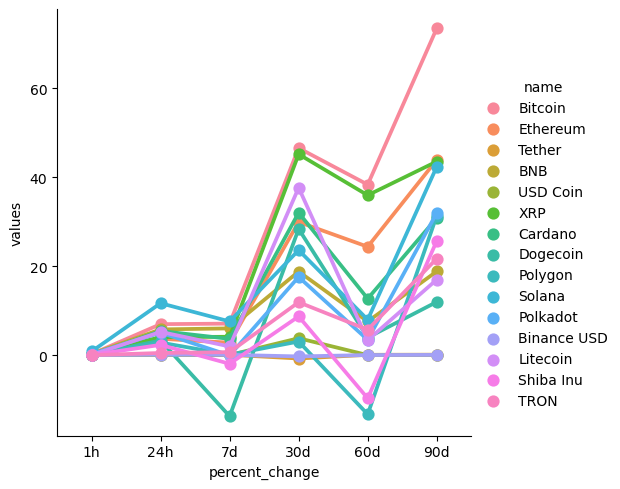

In [45]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [46]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30187.86516,2023-04-11 13:52:20.242588+00:00
15,Bitcoin,30188.61157,2023-04-11 13:53:21.121273+00:00
30,Bitcoin,30185.58028,2023-04-11 13:54:21.821064+00:00
45,Bitcoin,30170.42547,2023-04-11 13:55:22.609397+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

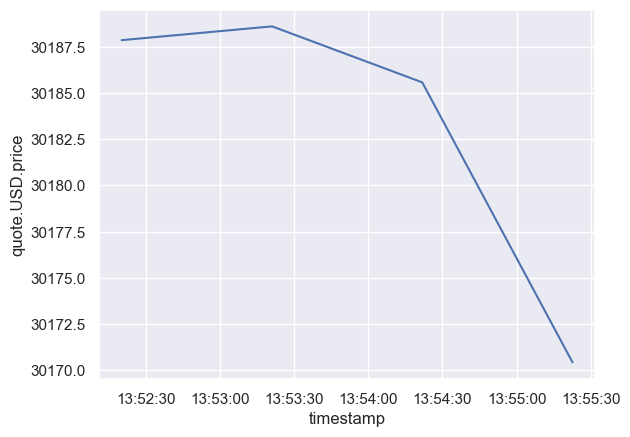

In [47]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)